# PHYS3600ID Final Project

## Authors: Alex Chen, Janet Chavez Lope

## Sections of this notebook

- #### Setup 

- #### Visualizing Spectra

- #### Create a model to predict the total amount of mass in stars with a galaxy based on a spectra

- #### Create a model to predict the amount of cosmic dust in a galaxy based on a spectra

- #### Create a model to predict how long ago did the galaxy form its first stars based on a spectra

- #### Create a model to predict the speed of the process of star formation based on a spectra

- #### Results


## Setup

### Getting Relevant Data

In [1]:
# Import Python Libraries
import pandas as pd
import numpy as np 

from matplotlib import pyplot as plt 
import seaborn as sns

from sklearn.linear_model import LinearRegression, Lasso
from sklearn.svm import SVR
from sklearn.linear_model import SGDRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import xgboost as xgb

from sklearn.model_selection import train_test_split, KFold, cross_validate, cross_val_predict ,GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler, FunctionTransformer
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA

In [2]:
# Create DataFrames
galaxyProperties = pd.read_csv("data/GalaxyProperties.csv")
spectra = pd.read_csv("data/spectra.csv")
wavelengths = pd.read_csv("data/wavelengths.csv")

In [3]:
# Selecting Target 1: Stellar Mass (Log10 Mass_Sun)
stellarMass = galaxyProperties['Log10(Mass/Mass_Sun)']

stellarMass_values = stellarMass.values

In [4]:
# Selecting Target 2: Dust
dust = galaxyProperties['Dust attenuation value']

dust_values = dust.values

In [5]:
# Selecting Target 3: Age (Gyr)
age = galaxyProperties['Age (Gyr)']

age_values = age.values

In [6]:
# Selecting Target 4: Tau (Gyr)
tau = galaxyProperties['Tau (Gyr)']

tau_values = tau.values

In [7]:
# Converting Spectra Data Into 850 Features
m = []
c = []

m.append(spectra.columns.values[0].split(" "))
for i in range(len(spectra)):
    m.append(spectra.loc[i][0].split(" "))
for i in range(850):
    c.append(f"feature_{1+i}")
 
spectra =  pd.DataFrame(m, columns=c)
X = spectra.values
spectra.shape

(1000, 850)

### Creating Variables to Get Data From Testing

In [8]:
# Creating list to store Negative Mean Squared Error for each kind of model

model_kind = ["Linear Regression","Support Vector Regression", "Stochastic Gradient Descent","K-nearest Neighbors", "Decision Tree", "Random Forest"]

stellarModelValues = []
dustModelValues = []
ageModelValues = []
tauModelValues = []

metric = "neg_mean_squared_error"

## Visualizing Spectra

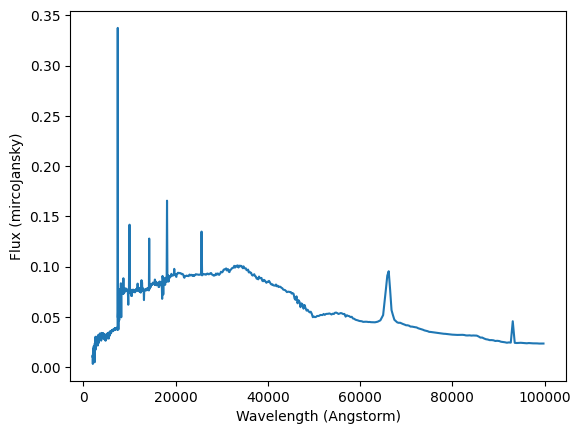

In [9]:
plt.plot(wavelengths, [float(x) for x in spectra.iloc[0].values])
plt.ylabel("Flux (mircoJansky)")
plt.xlabel("Wavelength (Angstorm)")
plt.show()

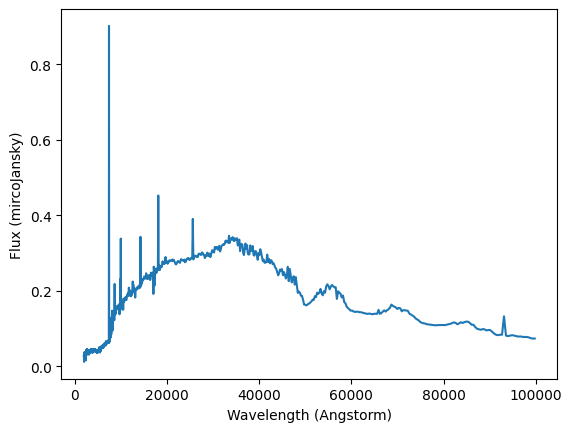

In [10]:
plt.plot(wavelengths, [float(x) for x in spectra.iloc[100].values])
plt.ylabel("Flux (mircoJansky)")
plt.xlabel("Wavelength (Angstorm)")
plt.show()

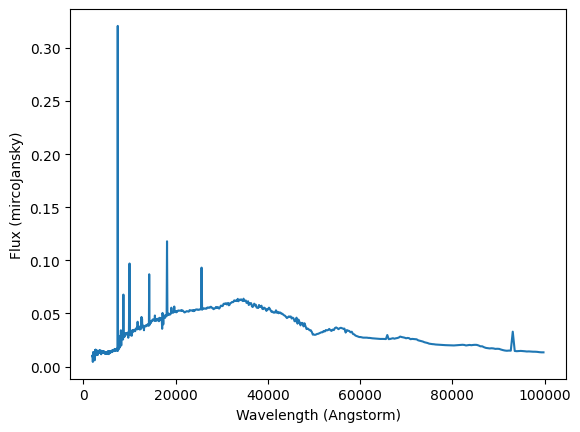

In [11]:
plt.plot(wavelengths, [float(x) for x in spectra.iloc[10].values])
plt.ylabel("Flux (mircoJansky)")
plt.xlabel("Wavelength (Angstorm)")
plt.show()

## Create a model to predict the total amount of mass in stars with a galaxy based on a spectra

In [12]:
# Training and testing a Linear Regression model for stellarMass_values
X_train, X_test, y_train, y_test = train_test_split(X, stellarMass_values, test_size=0.2, random_state=42)
reg = LinearRegression()
reg.fit(X_train, y_train)
print("Train Score: ",reg.score(X_train, y_train),"\n")
print("Test Score: ",reg.score(X_test, y_test),"\n")
tests = ['r2','neg_mean_squared_error','neg_root_mean_squared_error','neg_mean_absolute_error']
kf = KFold(n_splits=5, shuffle=True, random_state=42)
reg = LinearRegression()
cv_scores = cross_validate(reg, X, stellarMass_values,cv=kf, scoring=('r2','neg_mean_squared_error','neg_root_mean_squared_error','neg_mean_absolute_error'))
for test in tests:
    print(test+f" mean cross validate score: {np.mean(cv_scores['test_' + test])} \n")
    if test == metric:
        stellarModelValues.append(np.mean(cv_scores['test_' + test]))

Train Score:  0.9999999999997491 

Test Score:  -3782257.4624982835 

r2 mean cross validate score: -984068.2490084268 

neg_mean_squared_error mean cross validate score: -509788.6136878375 

neg_root_mean_squared_error mean cross validate score: -552.0529128698033 

neg_mean_absolute_error mean cross validate score: -69.19904360879562 



In [13]:
# Training and testing a SVR model for stellarMass_values
X_train, X_test, y_train, y_test = train_test_split(X, stellarMass_values, test_size=0.2, random_state=42)
svr = SVR()
svr.fit(X_train, y_train)
print("Train Score: ", svr.score(X_train, y_train),"\n")
print("Test Score: ", svr.score(X_test, y_test),"\n")
tests = ['r2','neg_mean_squared_error','neg_root_mean_squared_error','neg_mean_absolute_error']
kf = KFold(n_splits=5, shuffle=True, random_state=42)
svr = SVR()
cv_scores = cross_validate(svr, X, stellarMass_values,cv=kf, scoring=('r2','neg_mean_squared_error','neg_root_mean_squared_error','neg_mean_absolute_error'))
for test in tests:
    print(test+f" mean cross validate score: {np.mean(cv_scores['test_' + test])} \n")
    if test == metric:
        stellarModelValues.append(np.mean(cv_scores['test_' + test]))

Train Score:  0.8558787786364146 

Test Score:  0.854183485782114 

r2 mean cross validate score: 0.8345631639751142 

neg_mean_squared_error mean cross validate score: -0.08567050899377684 

neg_root_mean_squared_error mean cross validate score: -0.2923644282272101 

neg_mean_absolute_error mean cross validate score: -0.22108598838885007 



In [14]:
# Training and testing a SGDRegressor model for stellarMass_values
X_train, X_test, y_train, y_test = train_test_split(X, stellarMass_values, test_size=0.2, random_state=42)
sgd = SGDRegressor(random_state=42)
sgd.fit(X_train, y_train)
print("Train Score: ", sgd.score(X_train, y_train),"\n")
print("Test Score: ", sgd.score(X_test, y_test),"\n")
tests = ['r2','neg_mean_squared_error','neg_root_mean_squared_error','neg_mean_absolute_error']
kf = KFold(n_splits=5, shuffle=True, random_state=42)
sgd = SGDRegressor(random_state=42)
cv_scores = cross_validate(sgd, X, stellarMass_values,cv=kf, scoring=('r2','neg_mean_squared_error','neg_root_mean_squared_error','neg_mean_absolute_error'))
for test in tests:
    print(test+f" mean cross validate score: {np.mean(cv_scores['test_' + test])} \n")
    if test == metric:
        stellarModelValues.append(np.mean(cv_scores['test_' + test]))

Train Score:  -8.683412757362485e+26 

Test Score:  -2.4498768570247514e+27 

r2 mean cross validate score: -2.357665078400091e+26 

neg_mean_squared_error mean cross validate score: -1.2479054642288759e+26 

neg_root_mean_squared_error mean cross validate score: -10722133087744.629 

neg_mean_absolute_error mean cross validate score: -2796060592755.112 



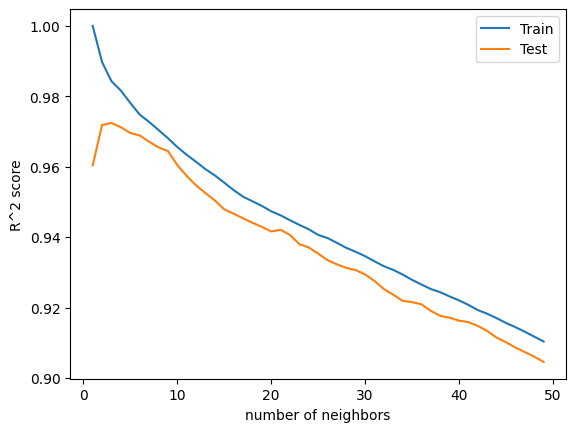

In [15]:
# Finding the best n_neighbors for a KNN model for stellarMass_values
X_train, X_test, y_train, y_test = train_test_split(X, stellarMass_values ,test_size=0.2, random_state=42)
values1 = []
values2 = []
for n in range(1,50):
    knn = KNeighborsRegressor(n_neighbors=n).fit(X_train, y_train)
    values1.append(knn.score(X_train, y_train))
    values2.append(knn.score(X_test, y_test))

plt.plot(range(1,50), values1, label='Train')
plt.plot(range(1,50), values2, label='Test')
plt.xlabel("number of neighbors")
plt.ylabel("R^2 score")
plt.legend()
plt.show()

From the graph above that highlights the train and test R^2 as function of number of neighbors for a KNN model, we see that the best model occurs when the number of neighbors is 3. To give our model to best score possible we use 3 for the n_neighbors hyperparameter.

In [16]:
# Training and testing a KNN model for stellarMass_values
X_train, X_test, y_train, y_test = train_test_split(X, stellarMass_values, test_size=0.2, random_state=42)
knn = KNeighborsRegressor(n_neighbors=3)
knn.fit(X_train, y_train)
print("Train Score: ", knn.score(X_train, y_train),"\n")
print("Test Score: ", knn.score(X_test, y_test),"\n")
tests = ['r2','neg_mean_squared_error','neg_root_mean_squared_error','neg_mean_absolute_error']
kf = KFold(n_splits=5, shuffle=True, random_state=42)
knn = KNeighborsRegressor(n_neighbors=3)
cv_scores = cross_validate(knn, X, stellarMass_values,cv=kf, scoring=('r2','neg_mean_squared_error','neg_root_mean_squared_error','neg_mean_absolute_error'))
for test in tests:
    print(test+f" mean cross validate score: {np.mean(cv_scores['test_' + test])} \n")
    if test == metric:
        stellarModelValues.append(np.mean(cv_scores['test_' + test]))

Train Score:  0.9842882044740907 

Test Score:  0.9724207903540447 

r2 mean cross validate score: 0.968390769603652 

neg_mean_squared_error mean cross validate score: -0.016447259353576864 

neg_root_mean_squared_error mean cross validate score: -0.1279022989682964 

neg_mean_absolute_error mean cross validate score: -0.09211693453101126 



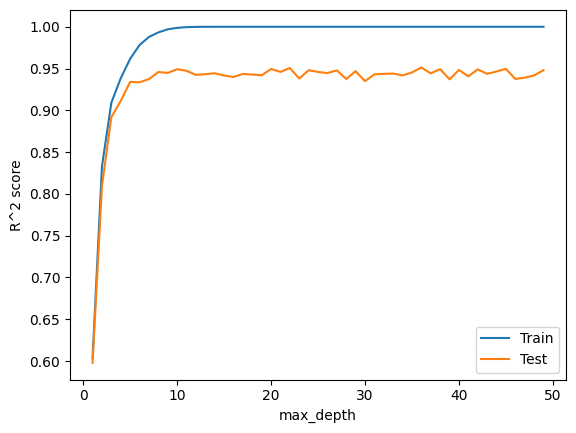

In [17]:
# Finding the best max_depth for Decision Tree model for stellarMass_values
X_train, X_test, y_train, y_test = train_test_split(X, stellarMass_values ,test_size=0.2, random_state=42)
values1 = []
values2 = []
for n in range(1,50):
    dt = DecisionTreeRegressor(max_depth=n).fit(X_train, y_train)
    values1.append(dt.score(X_train, y_train))
    values2.append(dt.score(X_test, y_test))

plt.plot(range(1,50), values1, label='Train')
plt.plot(range(1,50), values2, label='Test')
plt.xlabel("max_depth")
plt.ylabel("R^2 score")
plt.legend()
plt.show()

From the graph above that highlights the train and test R^2 as function of max depth for a Decision Tree model, we see that the best model occurs when the max depth is near 10. To give our model to best score possible we use 10 for the max_depth hyperparameter.

In [18]:
# Training and testing a Decision Tree model for stellarMass_values
X_train, X_test, y_train, y_test = train_test_split(X, stellarMass_values, test_size=0.2, random_state=42)
dt = DecisionTreeRegressor(max_depth=11)
dt.fit(X_train, y_train)
print("Train Score: ", dt.score(X_train, y_train),"\n")
print("Test Score: ", dt.score(X_test, y_test),"\n")
tests = ['r2','neg_mean_squared_error','neg_root_mean_squared_error','neg_mean_absolute_error']
kf = KFold(n_splits=5, shuffle=True, random_state=42)
dt = DecisionTreeRegressor(max_depth=11)
cv_scores = cross_validate(dt, X, stellarMass_values,cv=kf, scoring=('r2','neg_mean_squared_error','neg_root_mean_squared_error','neg_mean_absolute_error'))
for test in tests:
    print(test+f" mean cross validate score: {np.mean(cv_scores['test_' + test])} \n")
    if test == metric:
        stellarModelValues.append(np.mean(cv_scores['test_' + test]))

Train Score:  0.9995618962510272 

Test Score:  0.9393353734502226 

r2 mean cross validate score: 0.9450166292325175 

neg_mean_squared_error mean cross validate score: -0.028330333116061313 

neg_root_mean_squared_error mean cross validate score: -0.168170407966667 

neg_mean_absolute_error mean cross validate score: -0.11380391896207445 



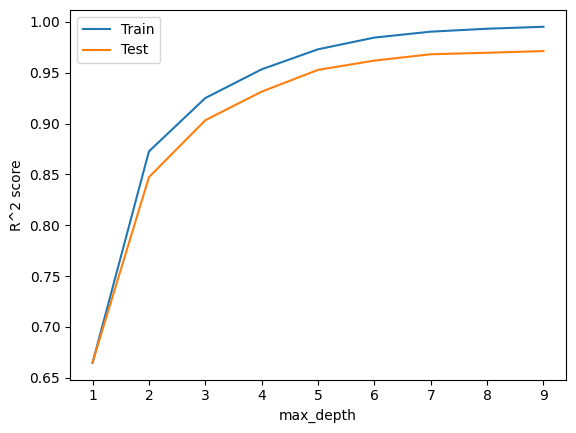

In [19]:
# Finding the best max_depth for Random Forest model for stellarMass_values
X_train, X_test, y_train, y_test = train_test_split(X, stellarMass_values ,test_size=0.2, random_state=42)
values1 = []
values2 = []
for n in range(1,10):
    rf = RandomForestRegressor(max_depth=n).fit(X_train, y_train)
    values1.append(rf.score(X_train, y_train))
    values2.append(rf.score(X_test, y_test))

plt.plot(range(1,10), values1, label='Train')
plt.plot(range(1,10), values2, label='Test')
plt.xlabel("max_depth")
plt.ylabel("R^2 score")
plt.legend()
plt.show()

From the graph above that highlights the train and test R^2 as function of max_depth of a Random Forest model, we see that the best model occurs when the max depth is around 9. To give our model to best score possible we use 10 for the max_depth hyperparameter.

In [20]:
# Training and testing a Random Forest model for stellarMass_values
X_train, X_test, y_train, y_test = train_test_split(X, stellarMass_values, test_size=0.2, random_state=42)
rf = RandomForestRegressor(random_state=42, max_depth=10)
rf.fit(X_train, y_train)
print("Train Score: ", rf.score(X_train, y_train),"\n")
print("Test Score: ", rf.score(X_test, y_test),"\n")
tests = ['r2','neg_mean_squared_error','neg_root_mean_squared_error','neg_mean_absolute_error']
kf = KFold(n_splits=5, shuffle=True, random_state=42)
rf = RandomForestRegressor(random_state=42, max_depth=10)
cv_scores = cross_validate(rf, X, stellarMass_values,cv=kf, scoring=('r2','neg_mean_squared_error','neg_root_mean_squared_error','neg_mean_absolute_error'))
for test in tests:
    print(test+f" mean cross validate score: {np.mean(cv_scores['test_' + test])} \n")
    if test == metric:
        stellarModelValues.append(np.mean(cv_scores['test_' + test]))

Train Score:  0.9953107613966578 

Test Score:  0.9722160757328454 

r2 mean cross validate score: 0.9717134176118337 

neg_mean_squared_error mean cross validate score: -0.014644534315130738 

neg_root_mean_squared_error mean cross validate score: -0.12088032251260805 

neg_mean_absolute_error mean cross validate score: -0.08007599023635582 



If we wanted to visualize the negative mean squared error for top 4 best the models, we can graph a bar graph to visualize them.

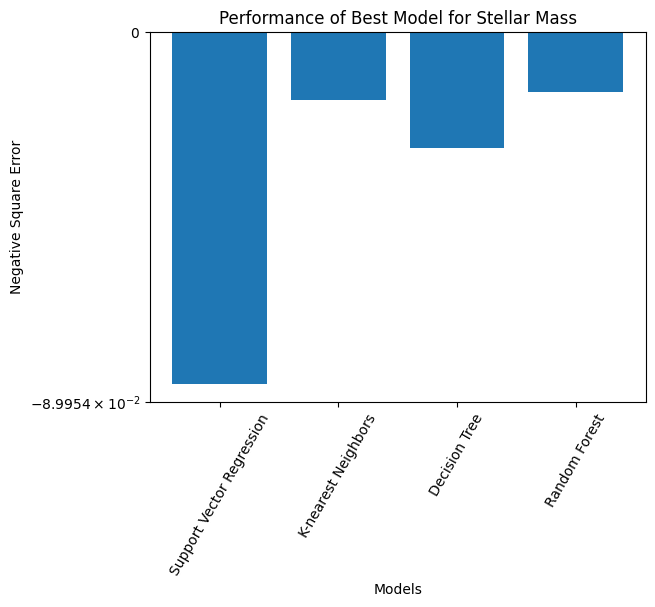

In [21]:
# Plotting the top 4 models with the lowest Negative Mean Squared Error 

#copying data
a = model_kind.copy()
b = stellarModelValues.copy()

# removing the two worst models 
a.remove("Linear Regression")
a.remove("Stochastic Gradient Descent")

b.pop(model_kind.index("Linear Regression"))
b.pop(model_kind.index('Stochastic Gradient Descent') - model_kind.index("Linear Regression") - 1)

#plotting
plt.yscale('symlog')
plt.bar(a, b)
plt.xticks(rotation=60)
plt.xlabel("Models")
plt.ylabel("Negative Square Error")
plt.title("Performance of Best Model for Stellar Mass")
plt.show()

If we wanted to visualize how well are best model is doing, we can create a scatter plot where the x-axis is the predicted values of stellar mass and the y-axis is the actual values of stellar mass to see it.

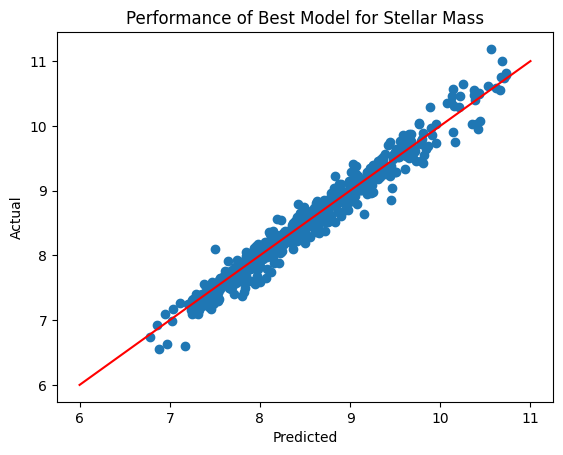

In [22]:
# Plotting a scatter plot of predict and actual stellar mass

stellar_pred = cross_val_predict(RandomForestRegressor(random_state=42, max_depth=10), X, stellarMass_values, cv=KFold(n_splits=5, shuffle=True, random_state=42))
plt.plot(range(round(stellarMass_values.min()) - 1, round(stellarMass_values.max() + 1)),range(round(stellarMass_values.min()) - 1, round(stellarMass_values.max() + 1)), color="red")
plt.scatter(stellar_pred, stellarMass_values)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Performance of Best Model for Stellar Mass")
plt.show()

From the scatter plot, most of the points are near the red line which is good thing as the closer all the points are to the red line the better our model is. 

### Stellar Mass Model Conclusions

After testing several different models with the original features, the `Stochastic Gradient Descent` model did the worst with a Negative Mean Squared Error of `-1.2479054642288759e+26 ` and our best was `Random Forest` model with a Negative Mean Squared Error of `-0.014644534315130738`. Since the best model's Negative Mean Squared Error is very close to 0, the opportunity cost to get it 0 is not worth our time since our model is already good. The scatter point highlights how well the model is able to predict stellar mass so there is real reason to improve our model. If we want to improve our model, maybe feature reduction will get us even closer to 0.

## Create a model to predict the amount of cosmic dust in a galaxy based on a spectra

In [23]:
# Training and training a Linear Regression model for dust_values
X_train, X_test, y_train, y_test = train_test_split(X, dust_values, test_size=0.2, random_state=42)
reg = LinearRegression()
reg.fit(X_train, y_train)
print("Train Score: ",reg.score(X_train, y_train),"\n")
print("Test Score: ",reg.score(X_test, y_test),"\n")
tests = ['r2','neg_mean_squared_error','neg_root_mean_squared_error','neg_mean_absolute_error']
kf = KFold(n_splits=5, shuffle=True, random_state=42)
reg = LinearRegression()
cv_scores = cross_validate(reg, X, dust_values,cv=kf, scoring=('r2','neg_mean_squared_error','neg_root_mean_squared_error','neg_mean_absolute_error'))
for test in tests:
    print(test+f" mean cross validate score: {np.mean(cv_scores['test_' + test])} \n")
    if test == metric:
        dustModelValues.append(np.mean(cv_scores['test_' + test]))

Train Score:  0.9999999999997927 

Test Score:  -148013.3254323751 

r2 mean cross validate score: -345614.1675871389 

neg_mean_squared_error mean cross validate score: -45684.92681870085 

neg_root_mean_squared_error mean cross validate score: -188.10353514666073 

neg_mean_absolute_error mean cross validate score: -23.195008482748204 



In [24]:
# Training and testing SVR model for dust_values
X_train, X_test, y_train, y_test = train_test_split(X, dust_values, test_size=0.2, random_state=42)
svr = SVR()
svr.fit(X_train, y_train)
print("Train Score: ", svr.score(X_train, y_train),"\n")
print("Test Score: ", svr.score(X_test, y_test),"\n")
tests = ['r2','neg_mean_squared_error','neg_root_mean_squared_error','neg_mean_absolute_error']
kf = KFold(n_splits=5, shuffle=True, random_state=42)
svr = SVR()
cv_scores = cross_validate(svr, X, dust_values,cv=kf, scoring=('r2','neg_mean_squared_error','neg_root_mean_squared_error','neg_mean_absolute_error'))
for test in tests:
    print(test+f" mean cross validate score: {np.mean(cv_scores['test_' + test])} \n")
    if test == metric:
        dustModelValues.append(np.mean(cv_scores['test_' + test]))

Train Score:  0.713182880358322 

Test Score:  0.6774015550765593 

r2 mean cross validate score: 0.6529728414357671 

neg_mean_squared_error mean cross validate score: -0.04327908293502629 

neg_root_mean_squared_error mean cross validate score: -0.2060720547125611 

neg_mean_absolute_error mean cross validate score: -0.11801316387765 



In [25]:
# Training SGDRegressor model for dust_values
X_train, X_test, y_train, y_test = train_test_split(X, dust_values, test_size=0.2, random_state=42)
sgd = SGDRegressor(random_state=42)
sgd.fit(X_train, y_train)
print("Train Score: ", sgd.score(X_train, y_train),"\n")
print("Test Score: ", sgd.score(X_test, y_test),"\n")
tests = ['r2','neg_mean_squared_error','neg_root_mean_squared_error','neg_mean_absolute_error']
kf = KFold(n_splits=5, shuffle=True, random_state=42)
sgd = SGDRegressor(random_state=42)
cv_scores = cross_validate(sgd, X, dust_values,cv=kf, scoring=('r2','neg_mean_squared_error','neg_root_mean_squared_error','neg_mean_absolute_error'))
for test in tests:
    print(test+f" mean cross validate score: {np.mean(cv_scores['test_' + test])} \n")
    if test == metric:
        dustModelValues.append(np.mean(cv_scores['test_' + test]))

Train Score:  -3.830961371206784e+27 

Test Score:  -8.224541236139737e+27 

r2 mean cross validate score: -4.566952920071573e+27 

neg_mean_squared_error mean cross validate score: -7.375297264677982e+26 

neg_root_mean_squared_error mean cross validate score: -16552301601967.76 

neg_mean_absolute_error mean cross validate score: -5110925649803.204 



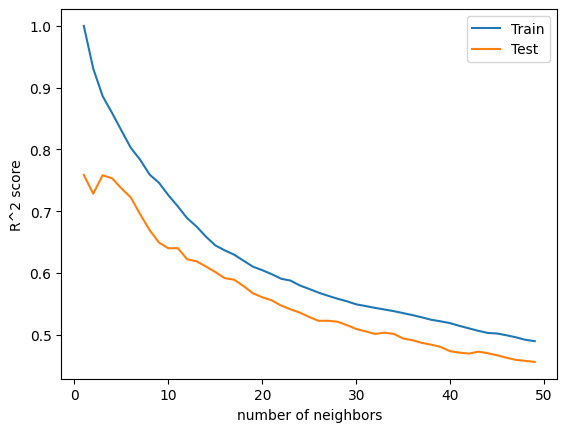

In [26]:
# Finding the best n_neighbors for a KNN model for dust_values
X_train, X_test, y_train, y_test = train_test_split(X, dust_values ,test_size=0.2, random_state=42)
values1 = []
values2 = []
for n in range(1,50):
    knn = KNeighborsRegressor(n_neighbors=n).fit(X_train, y_train)
    values1.append(knn.score(X_train, y_train))
    values2.append(knn.score(X_test, y_test))

plt.plot(range(1,50), values1, label='Train')
plt.plot(range(1,50), values2, label='Test')
plt.xlabel("number of neighbors")
plt.ylabel("R^2 score")
plt.legend()
plt.show()

From the graph above that highlights the train and test R^2 as function of number of neighbors for a KNN model, we see that the best model occurs when the number of neighbors is 3. To give our model to best score possible we use 3 for the n_neighbors hyperparameter.

In [27]:
# Training and testing KNN model for dust_values
X_train, X_test, y_train, y_test = train_test_split(X, dust_values, test_size=0.2, random_state=42)
knn = KNeighborsRegressor(n_neighbors=3)
knn.fit(X_train, y_train)
print("Train Score: ", knn.score(X_train, y_train),"\n")
print("Test Score: ", knn.score(X_test, y_test),"\n")
tests = ['r2','neg_mean_squared_error','neg_root_mean_squared_error','neg_mean_absolute_error']
kf = KFold(n_splits=5, shuffle=True, random_state=42)
knn = KNeighborsRegressor(n_neighbors=3)
cv_scores = cross_validate(knn, X, dust_values,cv=kf, scoring=('r2','neg_mean_squared_error','neg_root_mean_squared_error','neg_mean_absolute_error'))
for test in tests:
    print(test+f" mean cross validate score: {np.mean(cv_scores['test_' + test])} \n")
    if test == metric:
        dustModelValues.append(np.mean(cv_scores['test_' + test]))

Train Score:  0.8863427127279826 

Test Score:  0.7581213891407615 

r2 mean cross validate score: 0.7568358079295379 

neg_mean_squared_error mean cross validate score: -0.02999149577740014 

neg_root_mean_squared_error mean cross validate score: -0.17140373179619475 

neg_mean_absolute_error mean cross validate score: -0.08952926874679343 



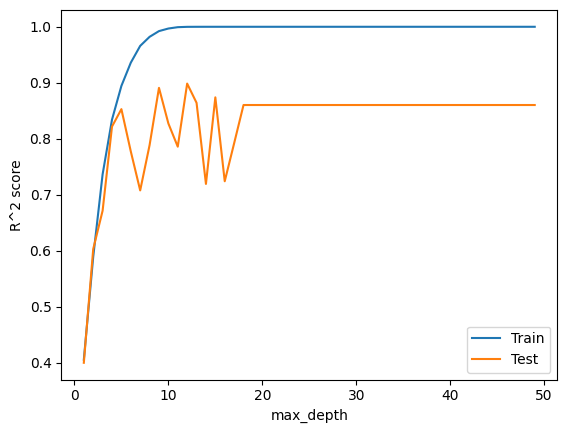

In [28]:
# Finding the best max_depth for a Decision Tree model for dust_values
X_train, X_test, y_train, y_test = train_test_split(X, dust_values ,test_size=0.2, random_state=42)
values1 = []
values2 = []
for n in range(1,50):
    dt = DecisionTreeRegressor(max_depth=n, random_state=42).fit(X_train, y_train)
    values1.append(dt.score(X_train, y_train))
    values2.append(dt.score(X_test, y_test))

plt.plot(range(1,50), values1, label='Train')
plt.plot(range(1,50), values2, label='Test')
plt.xlabel("max_depth")
plt.ylabel("R^2 score")
plt.legend()
plt.show()

From the graph above that highlights the train and test R^2 as function of max depth for a Decision Tree model, we see that the best model occurs when the max depth is near 15. To give our model to best score possible we use 15 for the max_depth hyperparameter.

In [29]:
# Training amd testing a Decision Tree model for dust_values
X_train, X_test, y_train, y_test = train_test_split(X, dust_values, test_size=0.2, random_state=42)
dt = DecisionTreeRegressor(max_depth=15, random_state=42)
dt.fit(X_train, y_train)
print("Train Score: ", dt.score(X_train, y_train),"\n")
print("Test Score: ", dt.score(X_test, y_test),"\n")
tests = ['r2','neg_mean_squared_error','neg_root_mean_squared_error','neg_mean_absolute_error']
kf = KFold(n_splits=5, shuffle=True, random_state=42)
dt = DecisionTreeRegressor(max_depth=15, random_state=42)
cv_scores = cross_validate(dt, X, dust_values,cv=kf, scoring=('r2','neg_mean_squared_error','neg_root_mean_squared_error','neg_mean_absolute_error'))
for test in tests:
    print(test+f" mean cross validate score: {np.mean(cv_scores['test_' + test])} \n")
    if test == metric:
        dustModelValues.append(np.mean(cv_scores['test_' + test]))

Train Score:  0.9999985253187201 

Test Score:  0.8739050205962456 

r2 mean cross validate score: 0.7434544761857769 

neg_mean_squared_error mean cross validate score: -0.029905113175540277 

neg_root_mean_squared_error mean cross validate score: -0.17158705293939597 

neg_mean_absolute_error mean cross validate score: -0.06844524662159891 



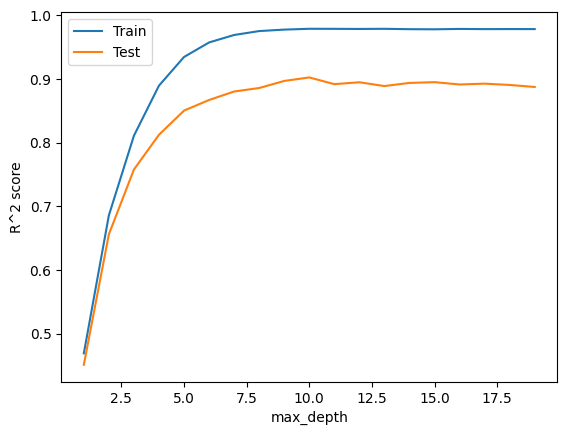

In [30]:
# Finding the best max_depth for a Random Forest model for dust_values
X_train, X_test, y_train, y_test = train_test_split(X, dust_values ,test_size=0.2, random_state=42)
values1 = []
values2 = []
for n in range(1,20):
    rf = RandomForestRegressor(max_depth=n, random_state=42).fit(X_train, y_train)
    values1.append(rf.score(X_train, y_train))
    values2.append(rf.score(X_test, y_test))

plt.plot(range(1,20), values1, label='Train')
plt.plot(range(1,20), values2, label='Test')
plt.xlabel("max_depth")
plt.ylabel("R^2 score")
plt.legend()
plt.show()

From the graph above that highlights the train and test R^2 as function of max_depth of a Random Forest model, we see that the best model occurs when the max depth is around 10. To give our model to best score possible we use 10 for the max_depth hyperparameter.

In [31]:
# Training and testing a Random Forest model for dust_values
X_train, X_test, y_train, y_test = train_test_split(X, dust_values, test_size=0.2, random_state=42)
rf = RandomForestRegressor(random_state=42, max_depth=10)
rf.fit(X_train, y_train)
print("Train Score: ", rf.score(X_train, y_train),"\n")
print("Test Score: ", rf.score(X_test, y_test),"\n")
tests = ['r2','neg_mean_squared_error','neg_root_mean_squared_error','neg_mean_absolute_error']
kf = KFold(n_splits=5, shuffle=True, random_state=42)
rf = RandomForestRegressor(random_state=42, max_depth=10)
cv_scores = cross_validate(rf, X, dust_values,cv=kf, scoring=('r2','neg_mean_squared_error','neg_root_mean_squared_error','neg_mean_absolute_error'))
for test in tests:
    print(test+f" mean cross validate score: {np.mean(cv_scores['test_' + test])} \n")
    if test == metric:
        dustModelValues.append(np.mean(cv_scores['test_' + test]))

Train Score:  0.9787952389656006 

Test Score:  0.90239312826274 

r2 mean cross validate score: 0.8680911070626195 

neg_mean_squared_error mean cross validate score: -0.016129906081161306 

neg_root_mean_squared_error mean cross validate score: -0.1254228928117803 

neg_mean_absolute_error mean cross validate score: -0.04762052456075864 



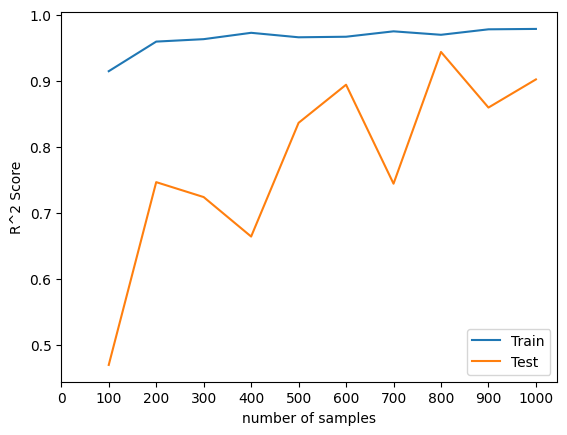

In [32]:
# Finding if the Random Forest model has high bias, high variance, or neither
values1 = []
values2 = []

for x in range(1,11):
    X_train, X_test, y_train, y_test = train_test_split(X[:100*x], dust_values[:100*x], test_size=0.2, random_state=42)
    rf = RandomForestRegressor(random_state=42, max_depth=10).fit(X_train, y_train)
    values1.append(rf.score(X_train, y_train))
    values2.append(rf.score(X_test, y_test))

plt.plot(range(1,11),values1, label="Train")
plt.plot(range(1,11),values2, label="Test")
plt.xticks(range(0, 11),[x * 100 for x in range(0, 11)])
plt.xlabel("number of samples")
plt.ylabel("R^2 Score")
plt.legend()
plt.show()

From the graph above, we see that train and test R^2 scores converging but never cross paths. This means the model doesn't have high bias or higher variance. Maybe features would help improve the model but very marginally. We will test that.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


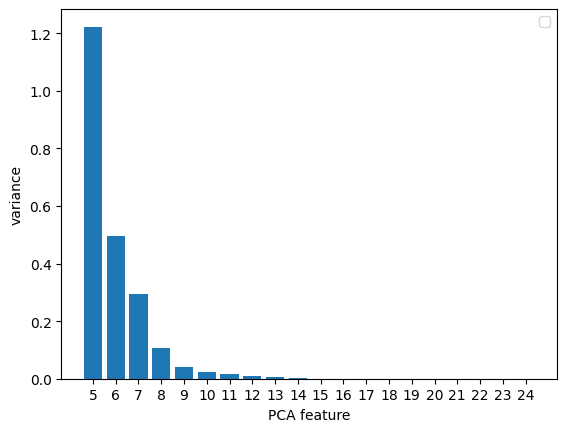

In [33]:
# Plotting the explained variances
pca = PCA()
pca.fit(X)
threshold = 0.01

features = range(5,25)
plt.bar(features, pca.explained_variance_[5:25])
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features)
plt.legend()
plt.show()

In [34]:
# Preforming dimension reduction with PCA
pca = PCA(n_components=12)
pca.fit(X)
X_pca = pca.transform(X)
X_pca.shape

(1000, 12)

Reduces the number of features to 12

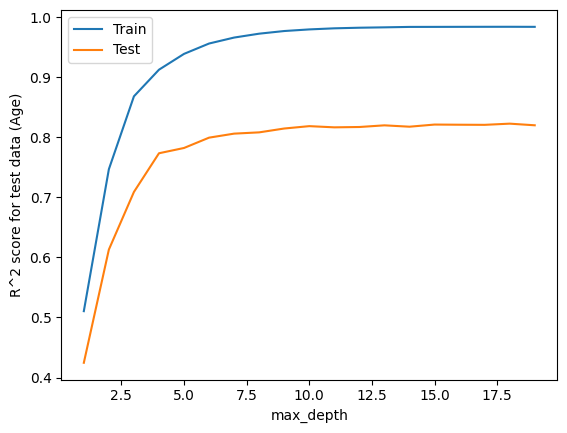

In [35]:
# Finding the best max_depth for Random Forest for dust_values with reduced features by PCA
X_train, X_test, y_train, y_test = train_test_split(X_pca, dust_values ,test_size=0.2, random_state=42)
values1 = []
values2 = []
for n in range(1,20):
    rf = RandomForestRegressor(max_depth=n, random_state=42).fit(X_train, y_train)
    values1.append(rf.score(X_train, y_train))
    values2.append(rf.score(X_test, y_test))

plt.plot(range(1,20), values1, label='Train')
plt.plot(range(1,20), values2, label='Test')
plt.xlabel("max_depth")
plt.ylabel("R^2 score for test data (Age)")
plt.legend()
plt.show()

From the graph above that highlights the train and test R^2 as function of max_depth of a Random Forest model with reduced, we see that the best model occurs when the max depth is around 10. To give our model to best score possible we use 10 for the max_depth hyperparameter.

In [36]:
# Training and testing a Random Forest model for dust_values with reduced features by PCA
X_train, X_test, y_train, y_test = train_test_split(X_pca, dust_values, test_size=0.2, random_state=42)
rf = RandomForestRegressor(random_state=42, max_depth=15)
rf.fit(X_train, y_train)
print("Train Score: ", rf.score(X_train, y_train),"\n")
print("Test Score: ", rf.score(X_test, y_test),"\n")
tests = ['r2','neg_mean_squared_error','neg_root_mean_squared_error','neg_mean_absolute_error']
kf = KFold(n_splits=5, shuffle=True, random_state=42)
rf = RandomForestRegressor(random_state=42, max_depth=15)
cv_scores = cross_validate(rf, X_pca, dust_values,cv=kf, scoring=('r2','neg_mean_squared_error','neg_root_mean_squared_error','neg_mean_absolute_error'))
for test in tests:
    print(test+f" mean cross validate score: {np.mean(cv_scores['test_' + test])} \n")
    if test == metric:
        dustModelValues.append(np.mean(cv_scores['test_' + test]))

Train Score:  0.9836975589597141 

Test Score:  0.8211127107933827 

r2 mean cross validate score: 0.8765844401186873 

neg_mean_squared_error mean cross validate score: -0.015518444669111467 

neg_root_mean_squared_error mean cross validate score: -0.12046358107046082 

neg_mean_absolute_error mean cross validate score: -0.053606438268882096 



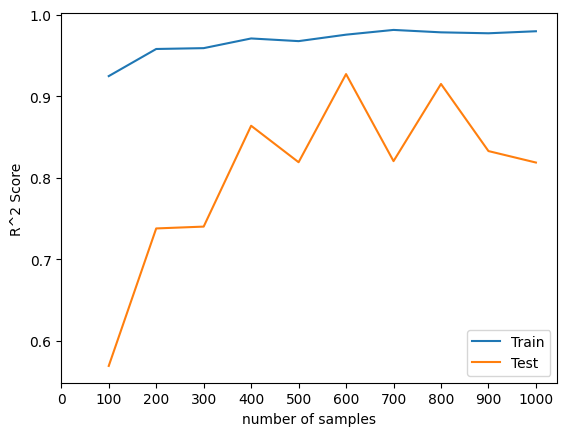

In [37]:
# Finding if the Random Forest model has high bias, high variance, or neither
values1 = []
values2 = []

for x in range(1,11):
    X_train, X_test, y_train, y_test = train_test_split(X_pca[:100*x], dust_values[:100*x], test_size=0.2, random_state=42)
    rf = RandomForestRegressor(random_state=42, max_depth=10).fit(X_train, y_train)
    values1.append(rf.score(X_train, y_train))
    values2.append(rf.score(X_test, y_test))

plt.plot(range(1,11),values1, label="Train")
plt.plot(range(1,11),values2, label="Test")
plt.xticks(range(0, 11),[x * 100 for x in range(0, 11)])
plt.xlabel("number of samples")
plt.ylabel("R^2 Score")
plt.legend()
plt.show()

From the graph above, we see that train and test R^2 scores converging but never cross paths. This means the model doesn't have high bias or higher variance.

If we wanted to visualize the negative mean squared error for top 4 best the models, we can graph a bar graph to visualize them.

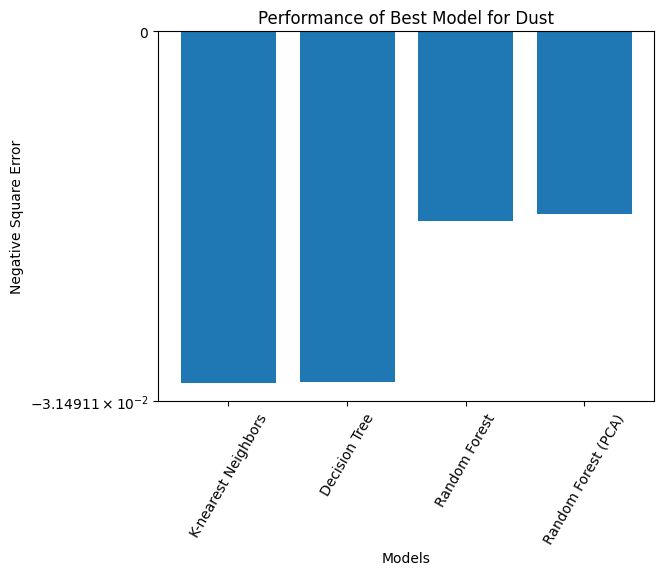

In [38]:
# Plotting the top 4 models with the lowest Negative Mean Squared Error 

# collecting data
a = model_kind.copy()
b = dustModelValues.copy()
a.append(a[-1] + " (PCA)")

# remove worst 3 models
a.remove("Linear Regression")
a.remove("Stochastic Gradient Descent")
a.remove("Support Vector Regression")
b.pop(model_kind.index("Linear Regression"))
b.pop(model_kind.index('Stochastic Gradient Descent') - model_kind.index("Linear Regression") - 1)
b.pop(model_kind.index('Support Vector Regression') - 1)

# plotting
plt.yscale('symlog')
plt.bar(a, b)
plt.xticks(rotation=60)
plt.xlabel("Models")
plt.ylabel("Negative Square Error")
plt.title("Performance of Best Model for Dust")
plt.show()

If we wanted to visualize how well are best model is doing, we can create a scatter plot where the x-axis is the predicted values of stellar mass and the y-axis is the actual values of stellar mass to see it.

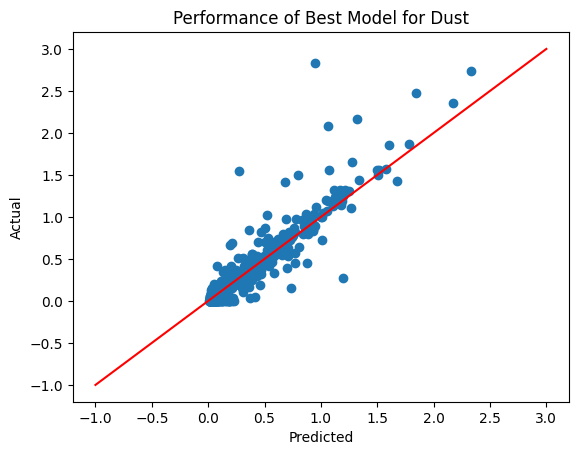

In [39]:
# Plotting a scatter plot of predict and actual dust value
dust_pred = cross_val_predict(RandomForestRegressor(random_state=42, max_depth=10), X_pca, dust_values, cv=KFold(n_splits=5, shuffle=True, random_state=42))

plt.scatter(dust_pred, dust_values)
plt.plot(range(round(dust_values.min()) - 1, round(dust_values.max() + 1)),range(round(dust_values.min()) - 1, round(dust_values.max() + 1)), color="red")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Performance of Best Model for Dust")
plt.show()

From the scatter plot, most of the points are near the red line which is good thing as the closer all the points are to the red line the better our model is. There are also some points that are very far away from the red line which is negative thing which means the best model didn't predict the dust value well. 

### Dust Mass Model Conclusions

After testing several different models with the original features, the `Stochastic Gradient Descent` model did the worst with a Negative Mean Squared Error of `-4.566952920071573e+27` and our best was `Random Forest` model with a Negative Mean Squared Error of `-0.016129906081161306`. Based on the fourth graph for this section, our best model has neither high bias or high variance and seems the train R^2 and test R^2 score are going converge to converge give more data. Since the scores seem to converge from a point where high variance is reason conclusion, the Negative Mean Squared Error may improve after preforming feature reduction with Principal Component Analysis (PCA). After performing PCA, the best `Random Forest` model has a Negative Mean Squared Error of `-0.015518444669111467 `. This result is to be expected since our original best `Random Forest` model was potential converting. 

## Create a model to predict how long ago did the galaxy form its first stars based on a spectra

In [40]:
# Training and testing a Linear Regression model for age_values
X_train, X_test, y_train, y_test = train_test_split(X, age_values, test_size=0.2, random_state=42)
reg = LinearRegression()
reg.fit(X_train, y_train)
print("Train Score: ",reg.score(X_train, y_train),"\n")
print("Test Score: ",reg.score(X_test, y_test),"\n")
tests = ['r2','neg_mean_squared_error','neg_root_mean_squared_error','neg_mean_absolute_error']
kf = KFold(n_splits=5, shuffle=True, random_state=42)
reg = LinearRegression()
cv_scores = cross_validate(reg, X, age_values,cv=kf, scoring=('r2','neg_mean_squared_error','neg_root_mean_squared_error','neg_mean_absolute_error'))
for test in tests:
    print(test+f" mean cross validate score: {np.mean(cv_scores['test_' + test])} \n")
    if test == metric:
        ageModelValues.append(np.mean(cv_scores['test_' + test]))

Train Score:  0.9999999999986388 

Test Score:  -17468074.753230974 

r2 mean cross validate score: -4601983.77273012 

neg_mean_squared_error mean cross validate score: -2869893.9538464276 

neg_root_mean_squared_error mean cross validate score: -1231.7559667381022 

neg_mean_absolute_error mean cross validate score: -155.07149954667287 



In [41]:
# Training and testing a SVR model for age_values
X_train, X_test, y_train, y_test = train_test_split(X, age_values, test_size=0.2, random_state=42)
svr = SVR()
svr.fit(X_train, y_train)
print("Train Score: ", svr.score(X_train, y_train),"\n")
print("Test Score: ", svr.score(X_test, y_test),"\n")
tests = ['r2','neg_mean_squared_error','neg_root_mean_squared_error','neg_mean_absolute_error']
kf = KFold(n_splits=5, shuffle=True, random_state=42)
svr = SVR()
cv_scores = cross_validate(svr, X, age_values,cv=kf, scoring=('r2','neg_mean_squared_error','neg_root_mean_squared_error','neg_mean_absolute_error'))
for test in tests:
    print(test+f" mean cross validate score: {np.mean(cv_scores['test_' + test])} \n")
    if test == metric:
        ageModelValues.append(np.mean(cv_scores['test_' + test]))

Train Score:  0.05081144666696791 

Test Score:  0.026122934113495644 

r2 mean cross validate score: 0.029358551051650795 

neg_mean_squared_error mean cross validate score: -0.6523813992697529 

neg_root_mean_squared_error mean cross validate score: -0.8066876879678316 

neg_mean_absolute_error mean cross validate score: -0.47954863925164554 



In [42]:
# Training and testing a SGDRegressor model for age_values
X_train, X_test, y_train, y_test = train_test_split(X, age_values, test_size=0.2, random_state=42)
sgd = SGDRegressor(random_state=42)
sgd.fit(X_train, y_train)
print("Train Score: ", sgd.score(X_train, y_train),"\n")
print("Test Score: ", sgd.score(X_test, y_test),"\n")
tests = ['r2','neg_mean_squared_error','neg_root_mean_squared_error','neg_mean_absolute_error']
kf = KFold(n_splits=5, shuffle=True, random_state=42)
sgd = SGDRegressor(random_state=42)
cv_scores = cross_validate(sgd, X, age_values,cv=kf, scoring=('r2','neg_mean_squared_error','neg_root_mean_squared_error','neg_mean_absolute_error'))
for test in tests:
    print(test+f" mean cross validate score: {np.mean(cv_scores['test_' + test])} \n")
    if test == metric:
        ageModelValues.append(np.mean(cv_scores['test_' + test]))

Train Score:  -6.277120311055022e+26 

Test Score:  -1.9741573215047457e+27 

r2 mean cross validate score: -1.1376371168928233e+27 

neg_mean_squared_error mean cross validate score: -7.238923800293615e+26 

neg_root_mean_squared_error mean cross validate score: -20854614239429.055 

neg_mean_absolute_error mean cross validate score: -6111215249065.317 



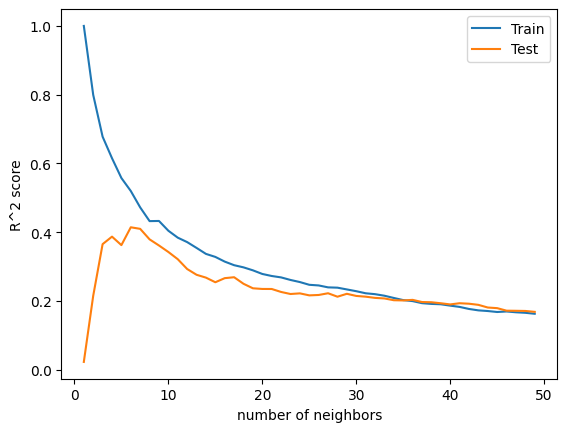

In [43]:
# Finding the best n_neighbors for KNN for age_values
X_train, X_test, y_train, y_test = train_test_split(X, age_values ,test_size=0.2, random_state=42)
values1 = []
values2 = []
for n in range(1,50):
    knn = KNeighborsRegressor(n_neighbors=n).fit(X_train, y_train)
    values1.append(knn.score(X_train, y_train))
    values2.append(knn.score(X_test, y_test))

plt.plot(range(1,50), values1, label='Train')
plt.plot(range(1,50), values2, label='Test')
plt.xlabel("number of neighbors")
plt.ylabel("R^2 score")
plt.legend()
plt.show()

From the graph above that highlights the train and test R^2 as function of number of neighbors for a KNN model, we see that the best model occurs when the number of neighbors is 3. To give our model to best score possible we use 3 for the n_neighbors hyperparameter. After try different values like 7 we got better score. This means we should be using another metric for the graph above.

In [44]:
# Training and testing a KNN model for age_values
X_train, X_test, y_train, y_test = train_test_split(X, age_values, test_size=0.2, random_state=42)
knn = KNeighborsRegressor(n_neighbors=3)
knn.fit(X_train, y_train)
print("Train Score: ", knn.score(X_train, y_train),"\n")
print("Test Score: ", knn.score(X_test, y_test),"\n")
tests = ['r2','neg_mean_squared_error','neg_root_mean_squared_error','neg_mean_absolute_error']
kf = KFold(n_splits=5, shuffle=True, random_state=42)
knn = KNeighborsRegressor(n_neighbors=3)
cv_scores = cross_validate(knn, X, age_values,cv=kf, scoring=('r2','neg_mean_squared_error','neg_root_mean_squared_error','neg_mean_absolute_error'))
for test in tests:
    print(test+f" mean cross validate score: {np.mean(cv_scores['test_' + test])} \n")
    if test == metric:
        ageModelValues.append(np.mean(cv_scores['test_' + test]))

Train Score:  0.6777529289531175 

Test Score:  0.3651432003507392 

r2 mean cross validate score: 0.33038136244293803 

neg_mean_squared_error mean cross validate score: -0.44923326858526724 

neg_root_mean_squared_error mean cross validate score: -0.6698005541281897 

neg_mean_absolute_error mean cross validate score: -0.4389554274259832 



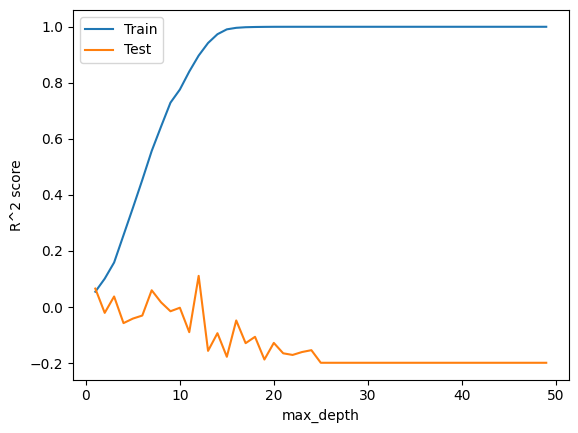

In [45]:
#Finding the best max_depth for Decision Tree for age_values
X_train, X_test, y_train, y_test = train_test_split(X, age_values ,test_size=0.2, random_state=42)
values1 = []
values2 = []
for n in range(1,50):
    dt = DecisionTreeRegressor(max_depth=n, random_state=42).fit(X_train, y_train)
    values1.append(dt.score(X_train, y_train))
    values2.append(dt.score(X_test, y_test))

plt.plot(range(1,50), values1, label='Train')
plt.plot(range(1,50), values2, label='Test')
plt.xlabel("max_depth")
plt.ylabel("R^2 score")
plt.legend()
plt.show()

From the graph above that highlights the train and test R^2 as function of max depth for a Decision Tree model, we see that the best model occurs when the max depth is near 13. To give our model to best score possible we use 13 for the max_depth hyperparameter. After try different values like 3 we got better score. This means we should be using another metric for the graph above.

In [46]:
# Training and testing a Decision Tree model for age_values
X_train, X_test, y_train, y_test = train_test_split(X, age_values, test_size=0.2, random_state=42)
dt = DecisionTreeRegressor(max_depth=13)
dt.fit(X_train, y_train)
print("Train Score: ", dt.score(X_train, y_train),"\n")
print("Test Score: ", dt.score(X_test, y_test),"\n")
tests = ['r2','neg_mean_squared_error','neg_root_mean_squared_error','neg_mean_absolute_error']
kf = KFold(n_splits=5, shuffle=True, random_state=42)
dt = DecisionTreeRegressor(max_depth=13)
cv_scores = cross_validate(dt, X, age_values,cv=kf, scoring=('r2','neg_mean_squared_error','neg_root_mean_squared_error','neg_mean_absolute_error'))
for test in tests:
    print(test+f" mean cross validate score: {np.mean(cv_scores['test_' + test])} \n")
    if test == metric:
        ageModelValues.append(np.mean(cv_scores['test_' + test]))

Train Score:  0.9421137561438996 

Test Score:  -0.26689326570135585 

r2 mean cross validate score: 0.003442788429666699 

neg_mean_squared_error mean cross validate score: -0.6668323546116979 

neg_root_mean_squared_error mean cross validate score: -0.814371750204951 

neg_mean_absolute_error mean cross validate score: -0.5087851975968207 



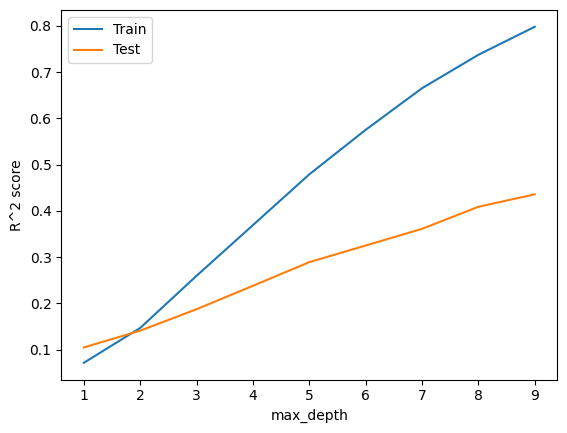

In [47]:
# Finding the best max_depth for Random Forest for age_values
X_train, X_test, y_train, y_test = train_test_split(X, age_values ,test_size=0.2, random_state=42)
values1 = []
values2 = []
for n in range(1,10):
    rf = RandomForestRegressor(max_depth=n, random_state=42).fit(X_train, y_train)
    values1.append(rf.score(X_train, y_train))
    values2.append(rf.score(X_test, y_test))

plt.plot(range(1,10), values1, label='Train')
plt.plot(range(1,10), values2, label='Test')
plt.xlabel("max_depth")
plt.ylabel("R^2 score")
plt.legend()
plt.show()

From the graph above that highlights the train and test R^2 as function of max_depth of a Random Forest model with reduced, we see that the best model occurs when the max depth is around 9. To give our model to best score possible we use 10 for the max_depth hyperparameter.

In [48]:
# Training and testing a Random Forest model for age_values
X_train, X_test, y_train, y_test = train_test_split(X, age_values, test_size=0.2, random_state=42)
rf = RandomForestRegressor(random_state=42, max_depth=10)
rf.fit(X_train, y_train)
print("Train Score: ", rf.score(X_train, y_train),"\n")
print("Test Score: ", rf.score(X_test, y_test),"\n")
tests = ['r2','neg_mean_squared_error','neg_root_mean_squared_error','neg_mean_absolute_error']
kf = KFold(n_splits=5, shuffle=True, random_state=42)
rf = RandomForestRegressor(random_state=42, max_depth=10)
cv_scores = cross_validate(rf, X, age_values,cv=kf, scoring=('r2','neg_mean_squared_error','neg_root_mean_squared_error','neg_mean_absolute_error'))
for test in tests:
    print(test+f" mean cross validate score: {np.mean(cv_scores['test_' + test])} \n")
    if test == metric:
        ageModelValues.append(np.mean(cv_scores['test_' + test]))

Train Score:  0.8438058487209497 

Test Score:  0.47165909873831713 

r2 mean cross validate score: 0.4235142493916954 

neg_mean_squared_error mean cross validate score: -0.38647295413082794 

neg_root_mean_squared_error mean cross validate score: -0.619993371053251 

neg_mean_absolute_error mean cross validate score: -0.4000106835663729 



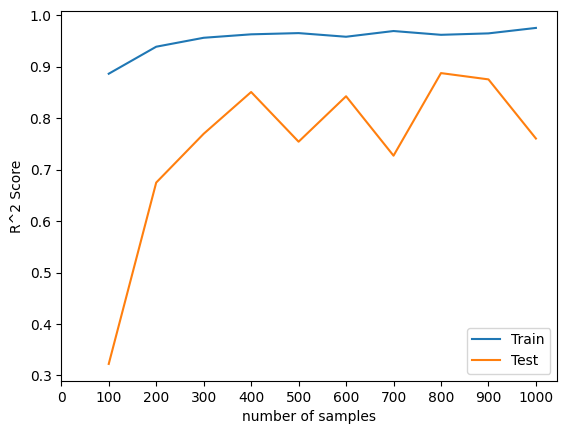

In [49]:
# Finding if the Random Forest model has high bias, high variance, or neither
values1 = []
values2 = []

for x in range(1,11):
    X_train, X_test, y_train, y_test = train_test_split(X_pca[:100*x], age_values[:100*x], test_size=0.2, random_state=42)
    rf = RandomForestRegressor(random_state=42, max_depth=10).fit(X_train, y_train)
    values1.append(rf.score(X_train, y_train))
    values2.append(rf.score(X_test, y_test))

plt.plot(range(1,11),values1, label="Train")
plt.plot(range(1,11),values2, label="Test")
plt.xticks(range(0, 11),[x * 100 for x in range(0, 11)])
plt.xlabel("number of samples")
plt.ylabel("R^2 Score")
plt.legend()
plt.show()

From the graph above, we see that train and test R^2 scores converging but never cross paths. There is seems to be a pattern of high variance through out the graph. Since there is high variance, we can reduced the number of features to improve our model.

In [50]:
# Preforming dimension reduction with PCA
pca = PCA(n_components=12)
pca.fit(X)
X_pca = pca.transform(X)
X_pca.shape

(1000, 12)

Reduces the number of features to 12

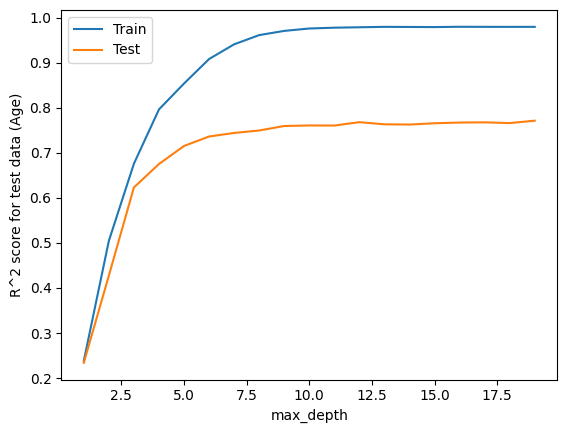

In [51]:
# Finding the best max_depth for a RandomForest model for age_values with reduced features with PCA
X_train, X_test, y_train, y_test = train_test_split(X_pca, age_values ,test_size=0.2, random_state=42)
values1 = []
values2 = []
for n in range(1,20):
    rf = RandomForestRegressor(max_depth=n, random_state=42).fit(X_train, y_train)
    values1.append(rf.score(X_train, y_train))
    values2.append(rf.score(X_test, y_test))

plt.plot(range(1,20), values1, label='Train')
plt.plot(range(1,20), values2, label='Test')
plt.xlabel("max_depth")
plt.ylabel("R^2 score for test data (Age)")
plt.legend()
plt.show()

From the graph above that highlights the train and test R^2 as function of max_depth of a Random Forest model with reduced, we see that the best model occurs when the max depth is around 15. To give our model to best score possible we use 15 for the max_depth hyperparameter.

In [52]:
# Training and testing a Random Forest model for age_values with reduced features by PCA
X_train, X_test, y_train, y_test = train_test_split(X_pca, age_values, test_size=0.2, random_state=42)
rf = RandomForestRegressor(random_state=42, max_depth=15)
rf.fit(X_train, y_train)
print("Train Score: ", rf.score(X_train, y_train),"\n")
print("Test Score: ", rf.score(X_test, y_test),"\n")
tests = ['r2','neg_mean_squared_error','neg_root_mean_squared_error','neg_mean_absolute_error']
kf = KFold(n_splits=5, shuffle=True, random_state=42)
rf = RandomForestRegressor(random_state=42, max_depth=15)
cv_scores = cross_validate(rf, X_pca, age_values,cv=kf, scoring=('r2','neg_mean_squared_error','neg_root_mean_squared_error','neg_mean_absolute_error'))
for test in tests:
    print(test+f" mean cross validate score: {np.mean(cv_scores['test_' + test])} \n")
    if test == metric:
        ageModelValues.append(np.mean(cv_scores['test_' + test]))

Train Score:  0.9788210621479987 

Test Score:  0.76539989037952 

r2 mean cross validate score: 0.8400473948456211 

neg_mean_squared_error mean cross validate score: -0.10636562838975434 

neg_root_mean_squared_error mean cross validate score: -0.3241476010673926 

neg_mean_absolute_error mean cross validate score: -0.1629545150033861 



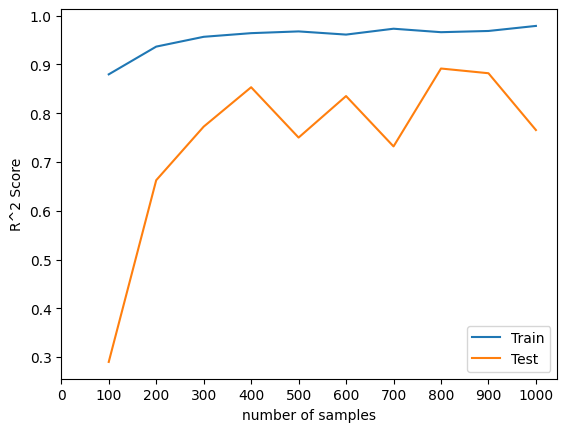

In [53]:
# Finding if the Random Forest model has high bias, high variance, or neither
values1 = []
values2 = []

for x in range(1,11):
    X_train, X_test, y_train, y_test = train_test_split(X_pca[:100*x], age_values[:100*x], test_size=0.2, random_state=42)
    rf = RandomForestRegressor(random_state=42, max_depth=15).fit(X_train, y_train)
    values1.append(rf.score(X_train, y_train))
    values2.append(rf.score(X_test, y_test))

plt.plot(range(1,11),values1, label="Train")
plt.plot(range(1,11),values2, label="Test")
plt.xticks(range(0, 11),[x * 100 for x in range(0, 11)])
plt.xlabel("number of samples")
plt.ylabel("R^2 Score")
plt.legend()
plt.show()

From the graph above, we see that train and test R^2 scores converging but never cross paths.

If we wanted to visualize the negative mean squared error for top 4 best the models, we can graph a bar graph to visualize them.

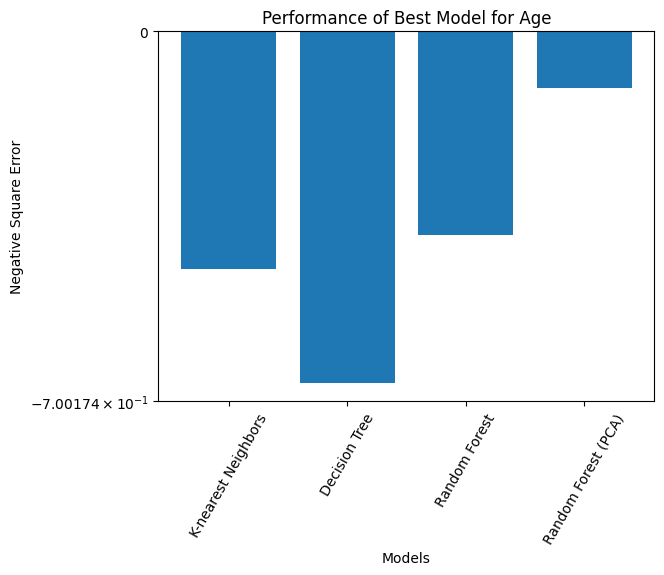

In [54]:
# Plotting the top 4 models with the lowest Negative Mean Squared Error 

# collecting data
a = model_kind.copy()
b = ageModelValues.copy()
a.append(a[-1] + " (PCA)")

# remove 3 worst model
b.pop(a.index("Linear Regression"))
a.remove("Linear Regression")
b.pop(a.index('Support Vector Regression'))
a.remove("Support Vector Regression")
b.pop(a.index('Stochastic Gradient Descent'))
a.remove("Stochastic Gradient Descent")

# plotting
plt.yscale('symlog')
plt.bar(a, b)
plt.xticks(rotation=60)
plt.xlabel("Models")
plt.ylabel("Negative Square Error")
plt.title("Performance of Best Model for Age")
plt.show()

If we wanted to visualize how well are best model is doing, we can create a scatter plot where the x-axis is the predicted values of stellar mass and the y-axis is the actual values of stellar mass to see it.

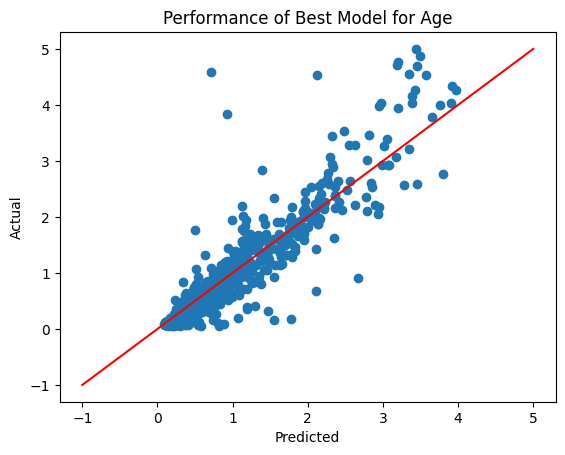

In [55]:
# Plotting a scatter plot of predict and actual age value
age_pred = cross_val_predict(RandomForestRegressor(random_state=42, max_depth=10), X_pca, age_values, cv=KFold(n_splits=5, shuffle=True, random_state=42))

plt.scatter(age_pred, age_values)
plt.plot(range(round(age_values.min()) - 1, round(age_values.max() + 1)),range(round(age_values.min()) - 1, round(age_values.max() + 1)), color="red")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Performance of Best Model for Age")
plt.show()

From the scatter plot, most of the points are near the red line which is good thing as the closer all the points are to the red line the better our model is. There are also some points that are very far away from the red line which is negative thing which means the best model didn't predict the dust value well. Overall it the model do okay predicting the the age value.

### Age Model Conclusions

After testing several different models with the original features, the `Stochastic Gradient Descent` model did the worst with a Negative Mean Squared Error of `-1.1376371168928233e+27` and our best was `Random Forest` model with a Negative Mean Squared Error of `-0.38647295413082794`. Based on the fourth graph for this section, our best model has neither high bias or high variance and seems the train R^2 and test R^2 score are going converge to converge give more data. Since the scores seem to converge from a point where high variance is reason conclusion, the Negative Mean Squared Error may improve after preforming feature reduction with Principal Component Analysis (PCA). After performing PCA, the best `Random Forest` model has a Negative Mean Squared Error of `-0.10636562838975434`.

## Create a model to predict the speed of the process of star formation proceeds based on a spectra

In [56]:
# Training and testing a  Linear Regression model for tau_values
X_train, X_test, y_train, y_test = train_test_split(X, tau_values, test_size=0.2, random_state=42)
reg = LinearRegression()
reg.fit(X_train, y_train)
print("Train Score: ",reg.score(X_train, y_train),"\n")
print("Test Score: ",reg.score(X_test, y_test),"\n")
tests = ['r2','neg_mean_squared_error','neg_root_mean_squared_error','neg_mean_absolute_error']
kf = KFold(n_splits=5, shuffle=True, random_state=42)
reg = LinearRegression()
cv_scores = cross_validate(reg, X, tau_values,cv=kf, scoring=('r2','neg_mean_squared_error','neg_root_mean_squared_error','neg_mean_absolute_error'))
for test in tests:
    print(test+f" mean cross validate score: {np.mean(cv_scores['test_' + test])} \n")
    if test == metric:
        tauModelValues.append(np.mean(cv_scores['test_' + test]))

Train Score:  0.999999999997784 

Test Score:  -6294766.514136302 

r2 mean cross validate score: -1799681.6800872448 

neg_mean_squared_error mean cross validate score: -3695444.9356062696 

neg_root_mean_squared_error mean cross validate score: -1477.660654801893 

neg_mean_absolute_error mean cross validate score: -190.395389512773 



In [57]:
# Training and training a SVR model for tau_values
X_train, X_test, y_train, y_test = train_test_split(X, tau_values, test_size=0.2, random_state=42)
svr = SVR()
svr.fit(X_train, y_train)
print("Train Score: ", svr.score(X_train, y_train),"\n")
print("Test Score: ", svr.score(X_test, y_test),"\n")
tests = ['r2','neg_mean_squared_error','neg_root_mean_squared_error','neg_mean_absolute_error']
kf = KFold(n_splits=5, shuffle=True, random_state=42)
svr = SVR()
cv_scores = cross_validate(svr, X, tau_values,cv=kf, scoring=('r2','neg_mean_squared_error','neg_root_mean_squared_error','neg_mean_absolute_error'))
for test in tests:
    print(test+f" mean cross validate score: {np.mean(cv_scores['test_' + test])} \n")
    if test == metric:
        tauModelValues.append(np.mean(cv_scores['test_' + test]))

Train Score:  -0.05172890669685892 

Test Score:  -0.05341259563805889 

r2 mean cross validate score: -0.05656882678930244 

neg_mean_squared_error mean cross validate score: -2.1559101978920068 

neg_root_mean_squared_error mean cross validate score: -1.457953299176859 

neg_mean_absolute_error mean cross validate score: -0.534447588015673 



In [58]:
# Training and training a SGDRegressor model for tau_values
X_train, X_test, y_train, y_test = train_test_split(X, tau_values, test_size=0.2, random_state=42)
sgd = SGDRegressor(random_state=42)
sgd.fit(X_train, y_train)
print("Train Score: ", sgd.score(X_train, y_train),"\n")
print("Test Score: ", sgd.score(X_test, y_test),"\n")
tests = ['r2','neg_mean_squared_error','neg_root_mean_squared_error','neg_mean_absolute_error']
kf = KFold(n_splits=5, shuffle=True, random_state=42)
sgd = SGDRegressor(random_state=42)
cv_scores = cross_validate(sgd, X, tau_values,cv=kf, scoring=('r2','neg_mean_squared_error','neg_root_mean_squared_error','neg_mean_absolute_error'))
for test in tests:
    print(test+f" mean cross validate score: {np.mean(cv_scores['test_' + test])} \n")
    if test == metric:
        tauModelValues.append(np.mean(cv_scores['test_' + test]))

Train Score:  -2.2605999721773348e+26 

Test Score:  -5.659600199377357e+26 

r2 mean cross validate score: -5.7153758997874875e+25 

neg_mean_squared_error mean cross validate score: -1.3034793568416937e+26 

neg_root_mean_squared_error mean cross validate score: -9461548766509.533 

neg_mean_absolute_error mean cross validate score: -2652381614402.339 



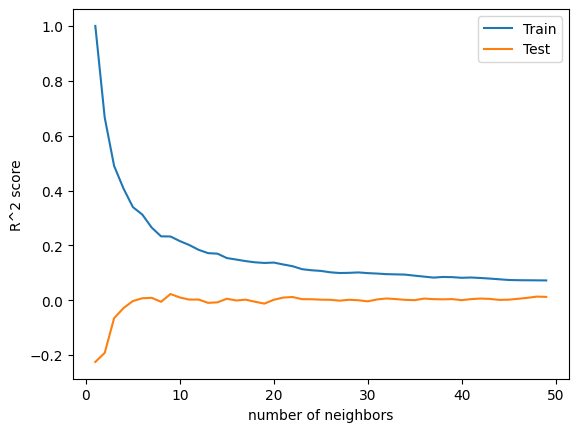

In [59]:
# Finding the best n_neighbors for a KNN model for tau_values
X_train, X_test, y_train, y_test = train_test_split(X, tau_values ,test_size=0.2, random_state=42)
values1 = []
values2 = []
for n in range(1,50):
    knn = KNeighborsRegressor(n_neighbors=n).fit(X_train, y_train)
    values1.append(knn.score(X_train, y_train))
    values2.append(knn.score(X_test, y_test))

plt.plot(range(1,50), values1, label='Train')
plt.plot(range(1,50), values2, label='Test')
plt.xlabel("number of neighbors")
plt.ylabel("R^2 score")
plt.legend()
plt.show()

From the graph above that highlights the train and test R^2 as function of number of neighbors for a KNN model, we see that the best model occurs when the number of neighbors is 19. To give our model to best score possible we use 19 for the n_neighbors hyperparameter. After try different values like 3 we got better score. This means we should be using another metric for the graph above.

In [60]:
# Training and testing a KNN model for tau_values
X_train, X_test, y_train, y_test = train_test_split(X, tau_values, test_size=0.2, random_state=42)
knn = KNeighborsRegressor(n_neighbors=3)
knn.fit(X_train, y_train)
print("Train Score: ", knn.score(X_train, y_train),"\n")
print("Test Score: ", knn.score(X_test, y_test),"\n")
tests = ['r2','neg_mean_squared_error','neg_root_mean_squared_error','neg_mean_absolute_error']
kf = KFold(n_splits=5, shuffle=True, random_state=42)
knn = KNeighborsRegressor(n_neighbors=3)
cv_scores = cross_validate(knn, X, tau_values,cv=kf, scoring=('r2','neg_mean_squared_error','neg_root_mean_squared_error','neg_mean_absolute_error'))
for test in tests:
    print(test+f" mean cross validate score: {np.mean(cv_scores['test_' + test])} \n")
    if test == metric:
        tauModelValues.append(np.mean(cv_scores['test_' + test]))

Train Score:  0.489669893045682 

Test Score:  -0.06537569417263134 

r2 mean cross validate score: -0.14700572609154658 

neg_mean_squared_error mean cross validate score: -2.2750920917090482 

neg_root_mean_squared_error mean cross validate score: -1.5054353691416449 

neg_mean_absolute_error mean cross validate score: -0.6884747509985722 



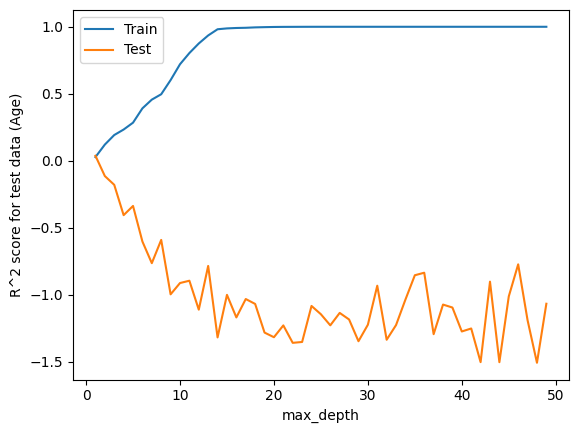

In [61]:
# Finding the best max_depth for Decision Tree for tau_values
X_train, X_test, y_train, y_test = train_test_split(X, tau_values ,test_size=0.2, random_state=42)
values1 = []
values2 = []
for n in range(1,50):
    dt = DecisionTreeRegressor(max_depth=n).fit(X_train, y_train)
    values1.append(dt.score(X_train, y_train))
    values2.append(dt.score(X_test, y_test))

plt.plot(range(1,50), values1, label='Train')
plt.plot(range(1,50), values2, label='Test')
plt.xlabel("max_depth")
plt.ylabel("R^2 score for test data (Age)")
plt.legend()
plt.show()

From the graph above that highlights the train and test R^2 as function of max depth for a Decision Tree model, we see that the best model occurs when the max depth is 0. To give our model to best score possible we let the model decide.

In [62]:
# Training and testing a Decision Tree model for tau_values
X_train, X_test, y_train, y_test = train_test_split(X, tau_values, test_size=0.2, random_state=42)
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)
print("Train Score: ", dt.score(X_train, y_train),"\n")
print("Test Score: ", dt.score(X_test, y_test),"\n")
tests = ['r2','neg_mean_squared_error','neg_root_mean_squared_error','neg_mean_absolute_error']
kf = KFold(n_splits=5, shuffle=True, random_state=42)
dt = DecisionTreeRegressor()
cv_scores = cross_validate(dt, X, tau_values,cv=kf, scoring=('r2','neg_mean_squared_error','neg_root_mean_squared_error','neg_mean_absolute_error'))
for test in tests:
    print(test+f" mean cross validate score: {np.mean(cv_scores['test_' + test])} \n")
    if test == metric:
        tauModelValues.append(np.mean(cv_scores['test_' + test]))

Train Score:  1.0 

Test Score:  -1.5183798599120633 

r2 mean cross validate score: -1.1983694799146174 

neg_mean_squared_error mean cross validate score: -4.160659914408808 

neg_root_mean_squared_error mean cross validate score: -2.0297599345202157 

neg_mean_absolute_error mean cross validate score: -0.8495510442268678 



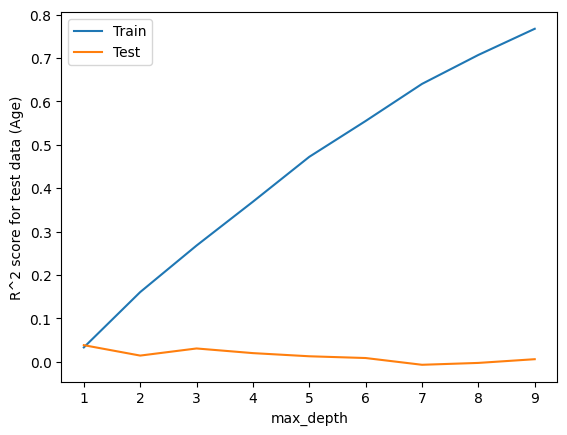

In [63]:
# Finding the best max_depth for a Random Forest for tau_values
X_train, X_test, y_train, y_test = train_test_split(X, tau_values ,test_size=0.2, random_state=42)
values1 = []
values2 = []
for n in range(1,10):
    rf = RandomForestRegressor(max_depth=n, random_state=42).fit(X_train, y_train)
    values1.append(rf.score(X_train, y_train))
    values2.append(rf.score(X_test, y_test))

plt.plot(range(1,10), values1, label='Train')
plt.plot(range(1,10), values2, label='Test')
plt.xlabel("max_depth")
plt.ylabel("R^2 score for test data (Age)")
plt.legend()
plt.show()

From the graph above that highlights the train and test R^2 as function of max_depth of a Random Forest model with reduced, we see that the best model occurs when the max depth is around 9. To give our model to best score possible we use 10 for the max_depth hyperparameter.

In [64]:
# Training and testing a Random Forest model for tau_values
X_train, X_test, y_train, y_test = train_test_split(X, tau_values, test_size=0.2, random_state=42)
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
print("Train Score: ", rf.score(X_train, y_train),"\n")
print("Test Score: ", rf.score(X_test, y_test),"\n")
tests = ['r2','neg_mean_squared_error','neg_root_mean_squared_error','neg_mean_absolute_error']
kf = KFold(n_splits=5, shuffle=True, random_state=42)
rf = RandomForestRegressor(random_state=42)
cv_scores = cross_validate(rf, X, tau_values,cv=kf, scoring=('r2','neg_mean_squared_error','neg_root_mean_squared_error','neg_mean_absolute_error'))
for test in tests:
    print(test+f" mean cross validate score: {np.mean(cv_scores['test_' + test])} \n")
    if test == metric:
        tauModelValues.append(np.mean(cv_scores['test_' + test]))

Train Score:  0.8761203304387981 

Test Score:  0.0075013423070054985 

r2 mean cross validate score: 0.08759705971907952 

neg_mean_squared_error mean cross validate score: -1.8307158614870567 

neg_root_mean_squared_error mean cross validate score: -1.3463050282956022 

neg_mean_absolute_error mean cross validate score: -0.6248414447451542 



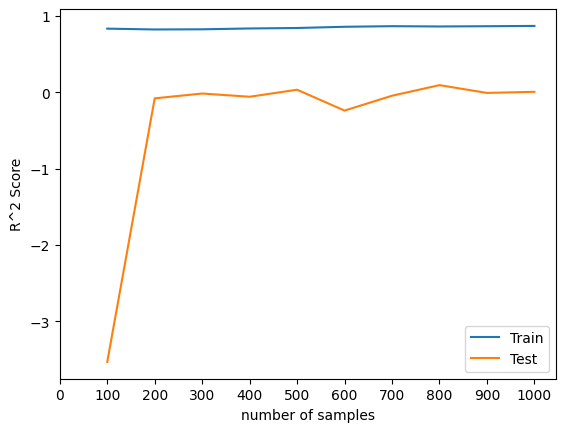

In [65]:
# Finding if the Random Forest model has high bias, high variance, or neither
values1 = []
values2 = []

for x in range(1,11):
    X_train, X_test, y_train, y_test = train_test_split(X[:100*x], tau_values[:100*x], test_size=0.2, random_state=42)
    rf = RandomForestRegressor(random_state=42, max_depth=15).fit(X_train, y_train)
    values1.append(rf.score(X_train, y_train))
    values2.append(rf.score(X_test, y_test))

plt.plot(range(1,11),values1, label="Train")
plt.plot(range(1,11),values2, label="Test")
plt.xticks(range(0, 11),[x * 100 for x in range(0, 11)])
plt.xlabel("number of samples")
plt.ylabel("R^2 Score")
plt.legend()
plt.show()

From the graph above we see high variance so we should reduce the number of features in our model

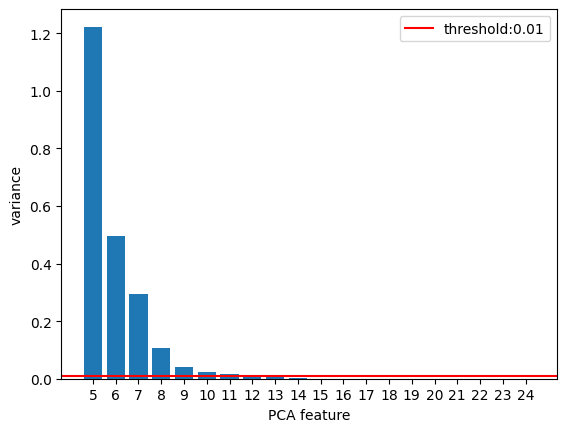

In [66]:
# Plotting the explained variances
pca = PCA()
pca.fit(X)
threshold = 0.01

features = range(5,25)
plt.bar(features, pca.explained_variance_[5:25])
plt.axhline(y=threshold, color='r', linestyle='-', label=f"threshold:{threshold}")
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features)
plt.legend()
plt.show()

In [67]:
# Preform dimension reduction with PCA
pca = PCA(n_components=12)
pca.fit(X)
X_pca = pca.transform(X)
X_pca.shape

(1000, 12)

Reduces the number of features to 12

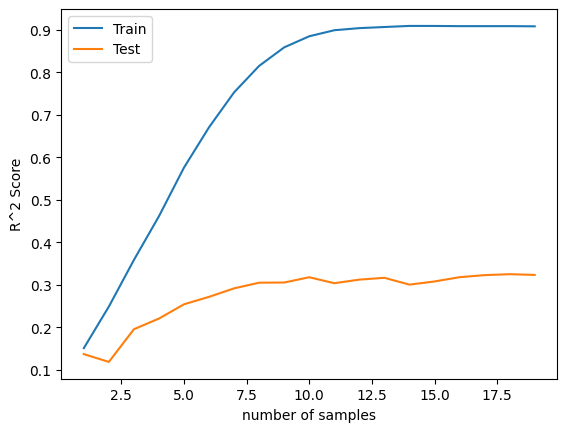

In [68]:
# Finding the best max_depth for a Random Forest model for tau_values and PCA features
X_train, X_test, y_train, y_test = train_test_split(X_pca, tau_values ,test_size=0.2, random_state=42)
values1 = []
values2 = []
for n in range(1,20):
    rf = RandomForestRegressor(max_depth=n, random_state=42).fit(X_train, y_train)
    values1.append(rf.score(X_train, y_train))
    values2.append(rf.score(X_test, y_test))

plt.plot(range(1,20), values1, label='Train')
plt.plot(range(1,20), values2, label='Test')
plt.xlabel("number of samples")
plt.ylabel("R^2 Score")
plt.legend()
plt.show()

From the graph above that highlights the train and test R^2 as function of max_depth of a Random Forest model with reduced, we see that the best model occurs when the max depth is around 18. To give our model to best score possible we use 18 for the max_depth hyperparameter.

In [69]:
#Training and testing a Random Forest model for tau_values with reduced features by PCA
X_train, X_test, y_train, y_test = train_test_split(X_pca, tau_values, test_size=0.2, random_state=42)
rf = RandomForestRegressor(random_state=42, max_depth=18)
rf.fit(X_train, y_train)
print("Train Score: ", rf.score(X_train, y_train),"\n")
print("Test Score: ", rf.score(X_test, y_test),"\n")
tests = ['r2','neg_mean_squared_error','neg_root_mean_squared_error','neg_mean_absolute_error']
kf = KFold(n_splits=5, shuffle=True, random_state=42)
rf = RandomForestRegressor(random_state=42, max_depth=18)
cv_scores = cross_validate(rf, X_pca, tau_values,cv=kf, scoring=('r2','neg_mean_squared_error','neg_root_mean_squared_error','neg_mean_absolute_error'))
for test in tests:
    print(test+f" mean cross validate score: {np.mean(cv_scores['test_' + test])} \n")
    if test == metric:
        tauModelValues.append(np.mean(cv_scores['test_' + test]))

Train Score:  0.908361995794148 

Test Score:  0.3251582856395542 

r2 mean cross validate score: 0.36030654861345546 

neg_mean_squared_error mean cross validate score: -1.3135592776995137 

neg_root_mean_squared_error mean cross validate score: -1.1353731096230697 

neg_mean_absolute_error mean cross validate score: -0.4444165057110043 



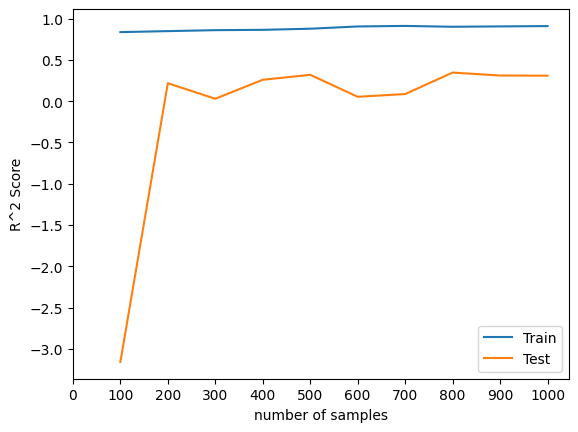

In [70]:
# Finding if the Random Forest model has high bias, high variance, or neither
values1 = []
values2 = []

for x in range(1,11):
    X_train, X_test, y_train, y_test = train_test_split(X_pca[:100*x], tau_values[:100*x], test_size=0.2, random_state=42)
    rf = RandomForestRegressor(random_state=42, max_depth=15).fit(X_train, y_train)
    values1.append(rf.score(X_train, y_train))
    values2.append(rf.score(X_test, y_test))

plt.plot(range(1,11),values1, label="Train")
plt.plot(range(1,11),values2, label="Test")
plt.xticks(range(0, 11),[x * 100 for x in range(0, 11)])
plt.xlabel("number of samples")
plt.ylabel("R^2 Score")
plt.legend()
plt.show()

From the graph above, we still see high variance with our model so are gonna to scaled the tau values by log and test the scaled data with our model

In [71]:
# Transforming tau to Log(tau)

log_tau_values = np.log(tau_values)
#log_tau_values

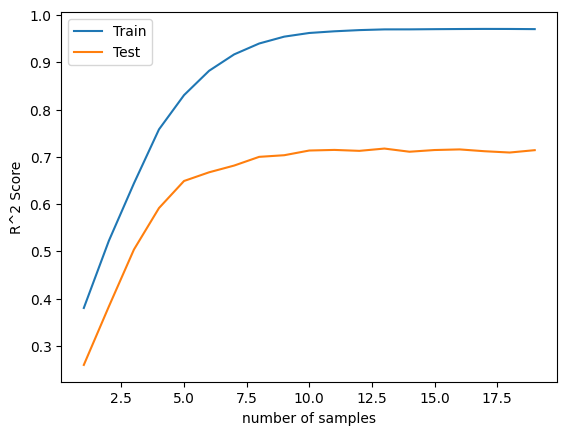

In [72]:
# Finding the best max_depth for a Random Forest model for scaled tau_values and PCA features
X_train, X_test, y_train, y_test = train_test_split(X_pca, log_tau_values,test_size=0.2, random_state=42)
values1 = []
values2 = []
for n in range(1,20):
    rf = RandomForestRegressor(max_depth=n, random_state=42).fit(X_train, y_train)
    values1.append(rf.score(X_train, y_train))
    values2.append(rf.score(X_test, y_test))

plt.plot(range(1,20), values1, label='Train')
plt.plot(range(1,20), values2, label='Test')
plt.xlabel("number of samples")
plt.ylabel("R^2 Score")
plt.legend()
plt.show()

In [73]:
# Training and testing a Random Forest model for scaled tau_values with reduced features by PCA
X_train, X_test, y_train, y_test = train_test_split(X_pca, log_tau_values, test_size=0.2, random_state=42)
rf = RandomForestRegressor(random_state=42, max_depth=19)
rf.fit(X_train, y_train)
print("Train Score: ", rf.score(X_train, y_train),"\n")
print("Test Score: ", rf.score(X_test, y_test),"\n")
tests = ['r2','neg_mean_squared_error','neg_root_mean_squared_error','neg_mean_absolute_error']
kf = KFold(n_splits=5, shuffle=True, random_state=42)
rf = RandomForestRegressor(random_state=42, max_depth=19)
cv_scores = cross_validate(rf, X_pca, log_tau_values,cv=kf, scoring=('r2','neg_mean_squared_error','neg_root_mean_squared_error','neg_mean_absolute_error'))
for test in tests:
    print(test+f" mean cross validate score: {np.mean(cv_scores['test_' + test])} \n")
    if test == metric:
        tauModelValues.append(np.mean(cv_scores['test_' + test]))

Train Score:  0.9700998239725551 

Test Score:  0.7140207792164591 

r2 mean cross validate score: 0.7794824506932457 

neg_mean_squared_error mean cross validate score: -0.45769978833171265 

neg_root_mean_squared_error mean cross validate score: -0.6734433094971296 

neg_mean_absolute_error mean cross validate score: -0.41294368501875833 



If we wanted to visualize the negative mean squared error for top 4 best the models, we can graph a bar graph to visualize them.

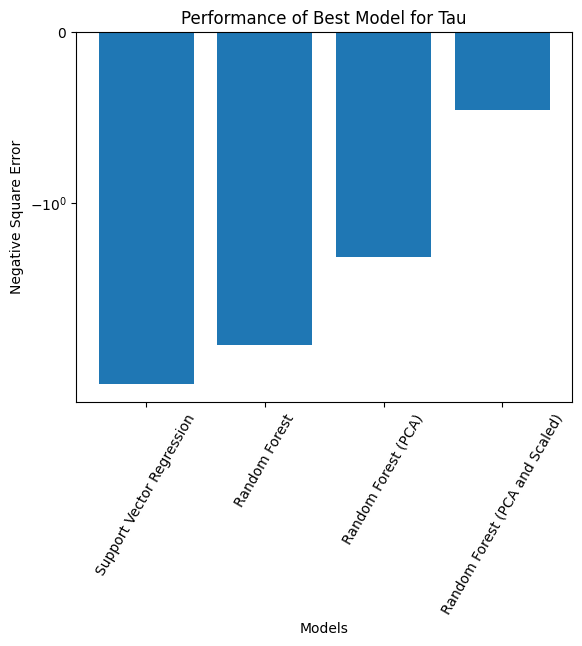

In [74]:
# Plotting the top 4 models with the lowest Negative Mean Squared Error 

# collecting data
a = model_kind.copy()
b = tauModelValues.copy()
a.append(a[-1] + " (PCA)")
a.append(a[-2] + " (PCA and Scaled)")

# remove 4 worst model
b.pop(a.index("Decision Tree"))
a.remove("Decision Tree")
b.pop(a.index('K-nearest Neighbors'))
a.remove("K-nearest Neighbors")
b.pop(a.index('Stochastic Gradient Descent'))
a.remove("Stochastic Gradient Descent")
b.pop(a.index('Linear Regression'))
a.remove("Linear Regression")

# plotting
plt.yscale('symlog')
plt.bar(a, b)
plt.xticks(rotation=60)
plt.xlabel("Models")
plt.ylabel("Negative Square Error")
plt.title("Performance of Best Model for Tau")
plt.show()

If we wanted to visualize how well are best model is doing, we can create a scatter plot where the x-axis is the predicted values of stellar mass and the y-axis is the actual values of stellar mass to see it.

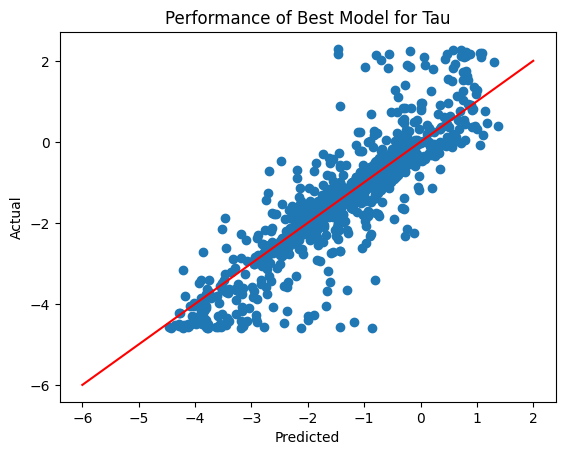

In [75]:
# Plotting a scatter plot of predict and actual age value
tau_pred = cross_val_predict(RandomForestRegressor(random_state=42, max_depth=10), X_pca, log_tau_values, cv=KFold(n_splits=5, shuffle=True, random_state=42))

plt.scatter(tau_pred, log_tau_values)
plt.plot(range(round(log_tau_values.min()) - 1, round(log_tau_values.max() + 1)),range(round(log_tau_values.min()) - 1, round(log_tau_values.max() + 1)), color="red")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Performance of Best Model for Tau")
plt.show()

From the scatter plot, there seems to be an large concentration of points near the red but there still a lot of points far away from the red line. If we improve the best model there would be more points on or closer to the red line. Overall it the model do okay predicting the the tau value but there is still a need for improvement.

### Tau Model Conclusions

After testing several different models with the original features, the `Stochastic Gradient Descent` model did the worst with a Negative Mean Squared Error of `-5.7153758997874875e+25` and our best was `Random Forest` model with a Negative Mean Squared Error of `-1.8307158614870567`. Based on the fourth graph for this section, our best model has high variance. Since our model have high variance, the Negative Mean Squared Error may improve after preforming feature reduction with Principal Component Analysis (PCA). After performing PCA, the best `Random Forest` model has a Negative Mean Squared Error of `-1.3135592776995137 `. After graphing the training R^2 and test R^2 score with the model that was trained with reduced data, we still saw high variance. Since we had high variance we scaled the tau values by log and train another model that was using the scaled data and reduced features and we got a Negative Mean Squared Error of `-0.45769978833171265 `. It should be noted that when comparing models that are and aren't scaled isn't a 1 to 1 comparison.

## Results

For our four models that are targeting Stellar Mass, Dust, Age, and Tau, the best models came from Random Forest model. Their Negative Mean Squared Error were  `-0.014644534315130738`, `-0.015518444669111467`, `-0.10636562838975434`, and `-0.45769978833171265` respectively. 

For the Stellar Mass model, there was no need for improvement as the opportunity cost to get to a Negative Mean Squared Error to 0 would not be worth it. 

For the Dust model, if all 850 features were used a Random Forest would get a Negative Mean Squared Error of `-0.016129906081161306` and if only the Intrinsic dimension where the threshold is 0.01 was used a Random Forest would get a Negative Mean Squared Error of `-0.015518444669111467`. 

For the Age model, if all 850 features were used a Random Forest would get a Negative Mean Squared Error of `-0.38647295413082794` and if only the Intrinsic dimension where the threshold is 0.01 was used a Random Forest would get a Negative Mean Squared Error of `-0.10636562838975434`. 

For the Tau model, if all 850 features were used a Random Forest would get a Negative Mean Squared Error of `-1.8307158614870567` and if only the Intrinsic dimension where the threshold is 0.01 was used a Random Forest would get a Negative Mean Squared Error of `-1.3135592776995137`. if only the Intrinsic dimension where the threshold is 0.01 and the tau values were scaled by log was used a Random Forest would get a Negative Mean Squared Error of `-0.45769978833171265`.

From the scatter plots for each model, their respective models ability to predict their target values is very good as one the graph the points are close to the red line for majority of the time.